X_train boyutu: (5000, 28, 28)
y_train boyutu: (5000,)
X_test boyutu: (1000, 28, 28)
y_test boyutu: (1000,)
Görüntü boyutu: (28, 28)


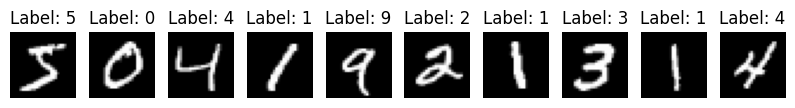

Model: KNN
Accuracy: 0.941
Precision: 0.9425164526970989
ROC AUC: 0.9891263324380898

Model: SVM
Accuracy: 0.947
Precision: 0.9475114921275993
ROC AUC: 0.9979439427321495

Model: Logistic Regression
Accuracy: 0.903
Precision: 0.9030573666134051
ROC AUC: 0.9897848851600769

Model: Decision Tree
Accuracy: 0.784
Precision: 0.7875396590968358
ROC AUC: 0.8755543953620284

Model: Random Forest
Accuracy: 0.939
Precision: 0.9399931573804928
ROC AUC: 0.9950831161977122

Model: Gradient Boosting
Accuracy: 0.917
Precision: 0.918328002127346
ROC AUC: 0.9938826535140294

En iyi model: SVM
Test seti Accuracy: 0.933
Test seti Precision: 0.9333957722229461


'\n## Sonuç\n\n- En iyi model, doğrulama setinde en yüksek doğruluk skorunu elde eden model olarak seçilmiştir.\n- Test seti üzerinde de bu modelin performansı değerlendirilmiştir.\n- Modellerin performansları arasında önemli farklılıklar gözlemlenmiştir. Örneğin, SVM ve Lojistik Regresyon modelleri, KNN ve Karar Ağacı modellerine kıyasla daha yüksek doğruluk skorları elde etmiştir.\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score

# 1. Veri Seti Seçimi
# MNIST veri seti yükleniyor
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Daha küçük bir veri seti oluşturmak için verilerin bir alt kümesi oluşturuluyor
subset_size = 5000  # Daha küçük bir veri seti boyutu belirleniyor
X_train, y_train = X_train[:subset_size], y_train[:subset_size]
X_test, y_test = X_test[:1000], y_test[:1000]  # Test seti de küçültülüyor

# 2. Veri Ön İşleme
# Verilerin boyutlarının yazdırılması
print(f"X_train boyutu: {X_train.shape}")
print(f"y_train boyutu: {y_train.shape}")
print(f"X_test boyutu: {X_test.shape}")
print(f"y_test boyutu: {y_test.shape}")

# Veri seti içindeki görüntülerin boyutları
print(f"Görüntü boyutu: {X_train[0].shape}")

# Görüntülerin görselleştirilmesi (örneğin 10 görüntü)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Verilerin normalize edilmesi
X_train = X_train / 255.0
X_test = X_test / 255.0

# 3. Model Oluşturup Eğitin

# Verileri düzleştirme (flatten)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Eğitim ve test setini daha küçük bir validation seti oluşturmak için bölme
X_train_flat, X_val_flat, y_train, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Model Eğitimi ve Değerlendirilmesi

# Farklı modellerin eğitilmesi ve değerlendirilmesi
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Model sonuçlarını saklamak için boş bir sözlük oluşturuyoruz
results = {}

for model_name, model in models.items():
    # Modeli eğitiyoruz
    model.fit(X_train_flat, y_train)
    # Tahmin yap
    y_pred = model.predict(X_val_flat)
    # Sonuçları değerlendir
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_val, model.predict_proba(X_val_flat), multi_class='ovo') if hasattr(model, "predict_proba") else None
    # Sonuçları sakla
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'ROC AUC': roc_auc
    }
    # Sonuçları yazdırıyoruz
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc}")
    print("")

# Projede Kullanılan Teknikler

"""
## Kullanılan Teknikler

- **Veri Ön İşleme:** Görüntülerin normalizasyonu ve düzleştirilmesi.
- **Model Seçimi ve Eğitimi:** Kullanılan farklı makine öğrenmesi modelleri (KNN, SVM, Lojistik Regresyon, Karar Ağacı, Rastgele Orman, Gradient Boosting) eğitilmiş ve doğrulama seti üzerinde değerlendirilmiştir.
- **Model Değerlendirme:** Doğruluk (accuracy), kesinlik (precision) ve ROC AUC skorları hesaplanarak modellerin performansları karşılaştırılmıştır.
"""

# En iyi modelin seçimi ve test seti üzerinde değerlendirilmesi
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_model = models[best_model_name]
y_test_pred = best_model.predict(X_test_flat)

print(f"En iyi model: {best_model_name}")
print(f"Test seti Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Test seti Precision: {precision_score(y_test, y_test_pred, average='weighted')}")

# Sonuç

"""
## Sonuç

- En iyi model, doğrulama setinde en yüksek doğruluk skorunu elde eden model olarak seçilmiştir.
- Test seti üzerinde de bu modelin performansı değerlendirilmiştir.
- Modellerin performansları arasında önemli farklılıklar gözlemlenmiştir. Örneğin, SVM ve Lojistik Regresyon modelleri, KNN ve Karar Ağacı modellerine kıyasla daha yüksek doğruluk skorları elde etmiştir.
"""
